In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
# Load the dataset
data = pd.read_csv("data/shopping_behavior.csv")

In [59]:
# Print the first 5 rows of the dataset
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


## Demographic Segmentation

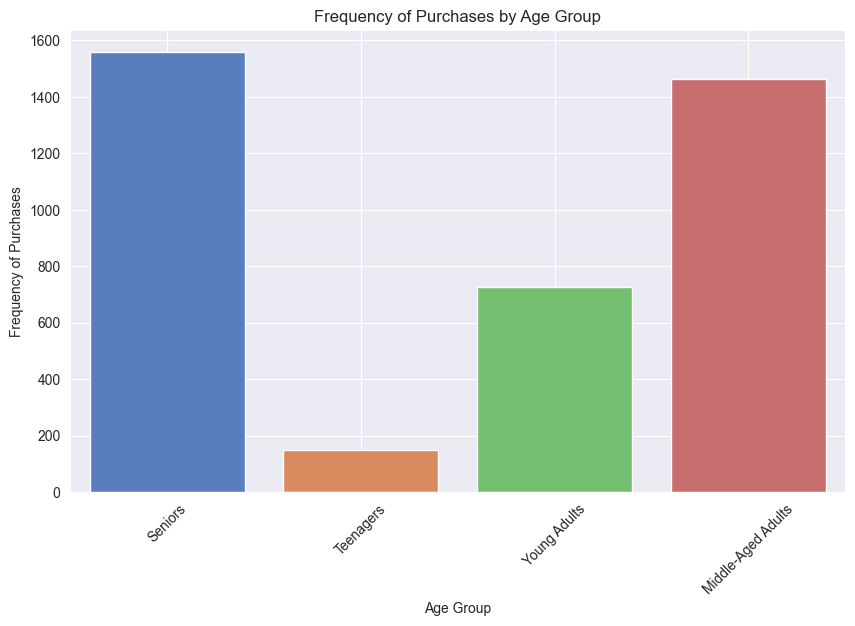

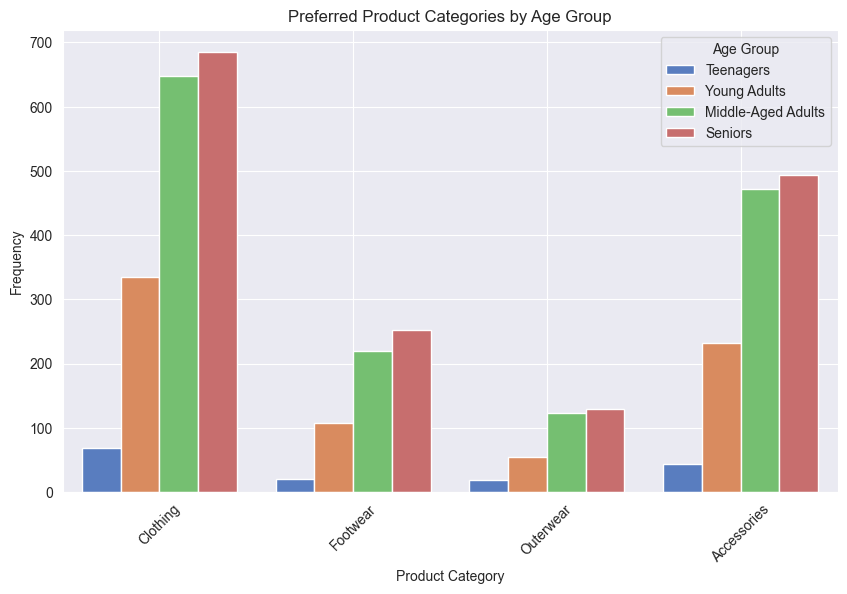

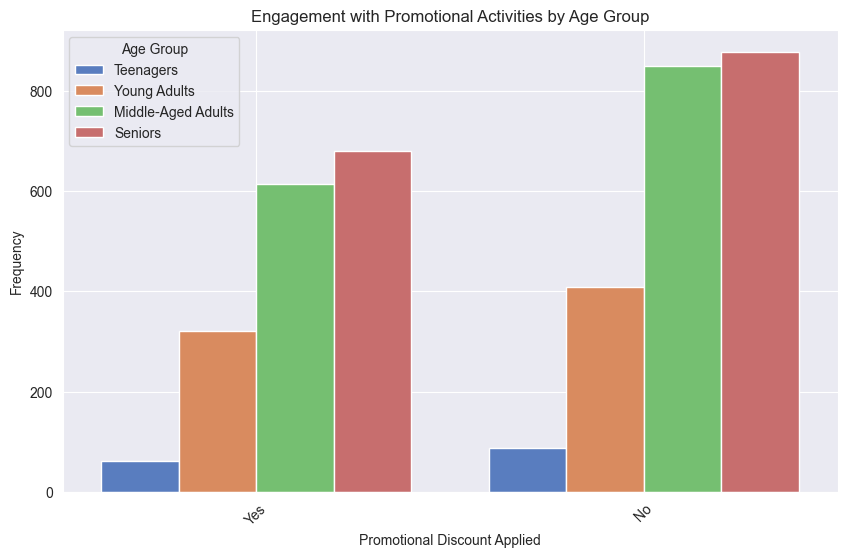

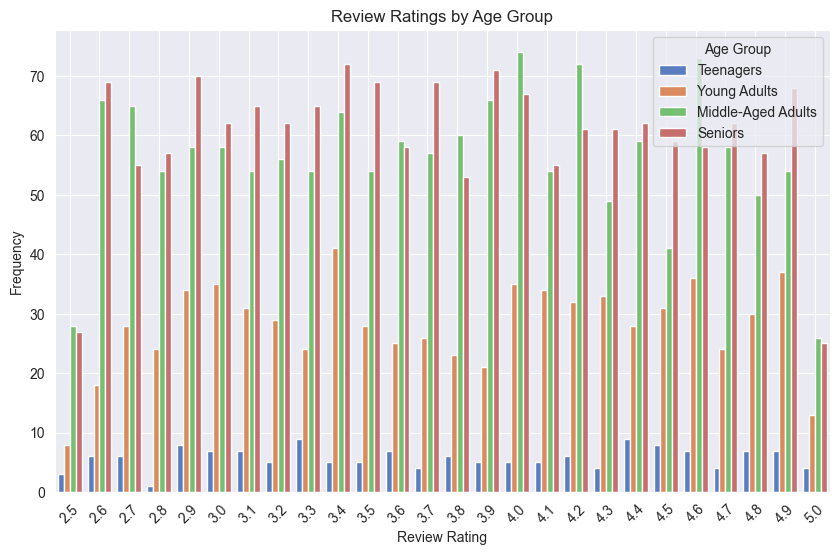

In [60]:
# Define age group ranges
age_groups = {
    'Teenagers': (13, 19),
    'Young Adults': (20, 29),
    'Middle-Aged Adults': (30, 49),
    'Seniors': (50, 100)  # Adjust upper age limit as needed
}

# Create a function to assign age groups
def assign_age_group(age):
    for group, (lower, upper) in age_groups.items():
        if lower <= age <= upper:
            return group
    return 'Unknown'

# Apply the function to create a new column 'Age Group'
data['Age Group'] = data['Age'].apply(assign_age_group)

# Plot frequency of purchases for each age group
plt.figure(figsize=(10, 6))
sns.countplot(x='Age Group', data=data, palette='muted', hue='Age Group')
plt.title('Frequency of Purchases by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Frequency of Purchases')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Plot preferred product categories for each age group
plt.figure(figsize=(10, 6))
sns.countplot(x='Category', hue='Age Group', data=data, palette='muted', hue_order=age_groups.keys())
plt.title('Preferred Product Categories by Age Group')
plt.xlabel('Product Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Age Group')
plt.grid(True)
plt.show()

# Plot engagement with promotional activities for each age group
plt.figure(figsize=(10, 6))
sns.countplot(x='Discount Applied', hue='Age Group', data=data, palette='muted', hue_order=age_groups.keys())
plt.title('Engagement with Promotional Activities by Age Group')
plt.xlabel('Promotional Discount Applied')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Age Group')
plt.grid(True)
plt.show()

# Plot review ratings for each age group
plt.figure(figsize=(10, 6))
sns.countplot(x='Review Rating', hue='Age Group', data=data, palette='muted', hue_order=age_groups.keys())
plt.title('Review Ratings by Age Group')
plt.xlabel('Review Rating')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Age Group')
plt.grid(True)
plt.show()

## Age Segmentation

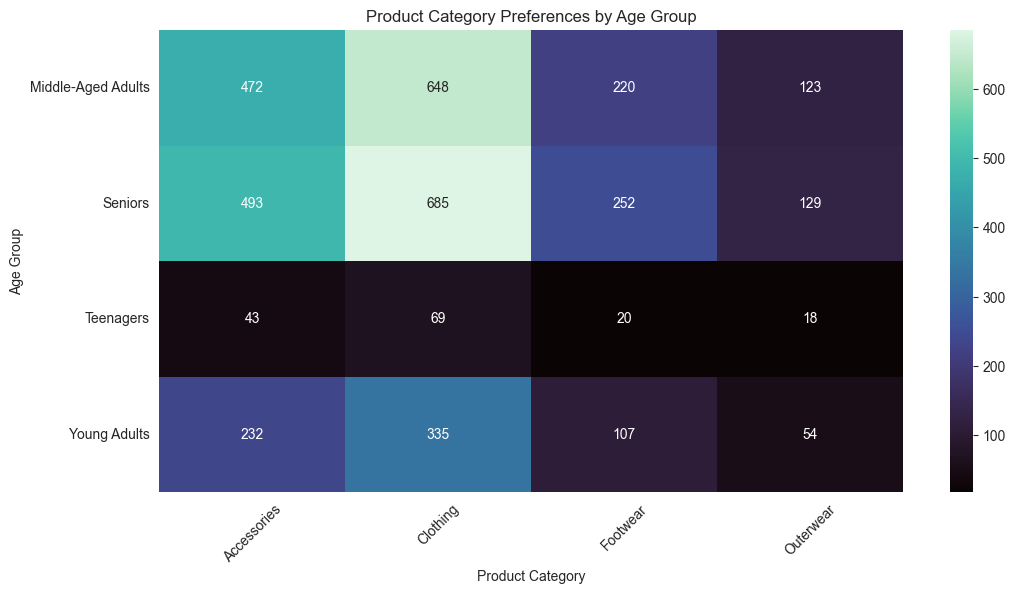

In [61]:
# Calculate the frequency of product categories by age group
product_category_frequency_by_age = data.groupby(['Age Group', 'Category']).size().unstack(fill_value=0)

# Plot the distribution of product category purchases by age group
plt.figure(figsize=(12, 6))
sns.heatmap(product_category_frequency_by_age, cmap='mako', annot=True, fmt='d')
plt.title('Product Category Preferences by Age Group')
plt.xlabel('Product Category')
plt.ylabel('Age Group')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

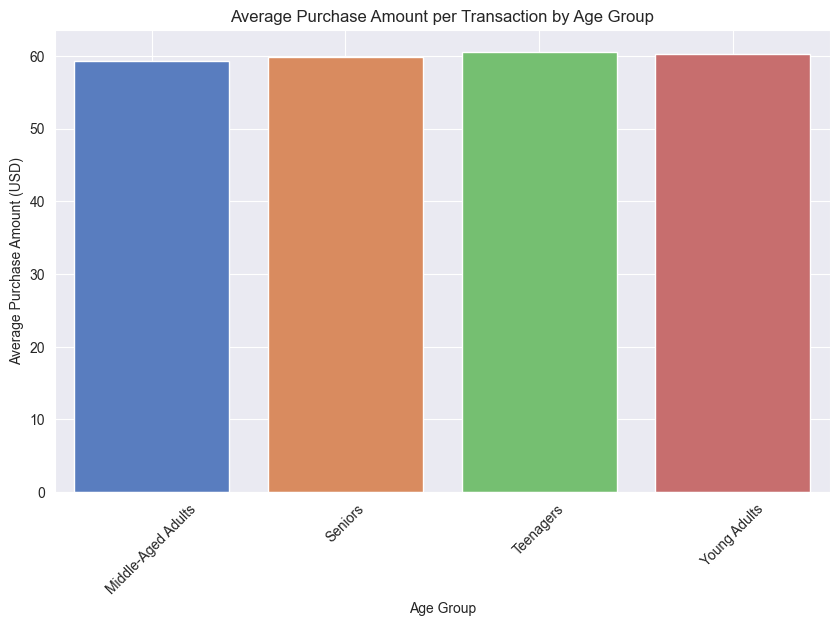

In [62]:
# Calculate the average purchase amount per transaction for each age group
average_purchase_amount_by_age = data.groupby('Age Group')['Purchase Amount (USD)'].mean()

# Plot the average purchase amount per transaction for each age group
plt.figure(figsize=(10, 6))
sns.barplot(x=average_purchase_amount_by_age.index, y=average_purchase_amount_by_age.values, palette='muted', hue=average_purchase_amount_by_age.index)
plt.title('Average Purchase Amount per Transaction by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Purchase Amount (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Gender Segmentation

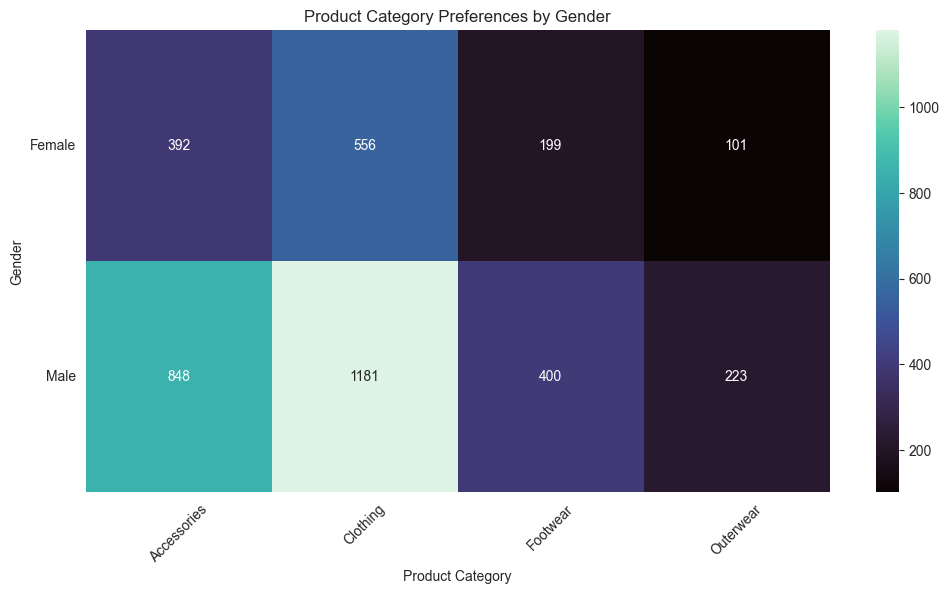

In [63]:
# Calculate the frequency of each product category by gender
product_category_frequency_by_gender = data.groupby(['Gender', 'Category']).size().unstack(fill_value=0)

# Plot the distribution of product category purchases between male and female customers
plt.figure(figsize=(12, 6))
sns.heatmap(product_category_frequency_by_gender, cmap='mako', annot=True, fmt='d')
plt.title('Product Category Preferences by Gender')
plt.xlabel('Product Category')
plt.ylabel('Gender')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

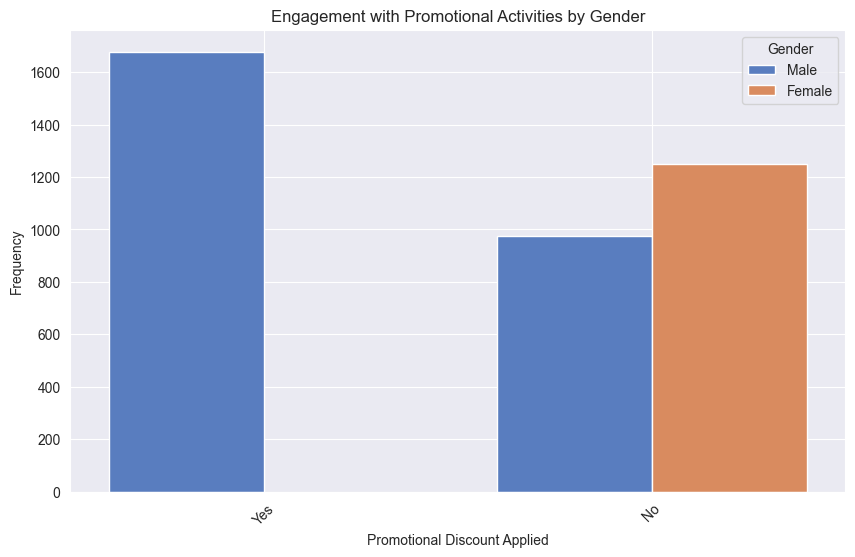

In [64]:
# Calculate the frequency of engagement with promotional activities by gender
promo_engagement_by_gender = data.groupby(['Gender', 'Discount Applied']).size().unstack(fill_value=0)

# Plot the distribution of engagement with promotional activities between male and female customers
plt.figure(figsize=(10, 6))
sns.countplot(x='Discount Applied', hue='Gender', data=data, palette='muted')
plt.title('Engagement with Promotional Activities by Gender')
plt.xlabel('Promotional Discount Applied')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.grid(True)
plt.show()

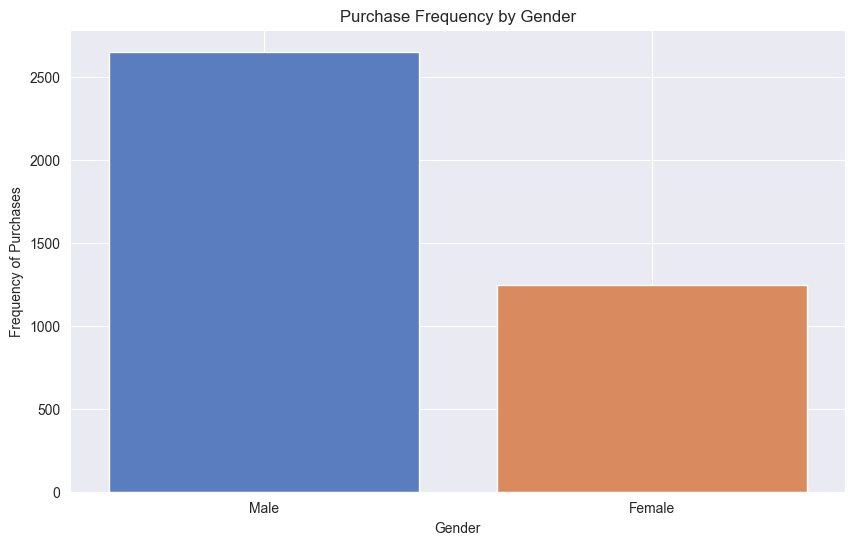

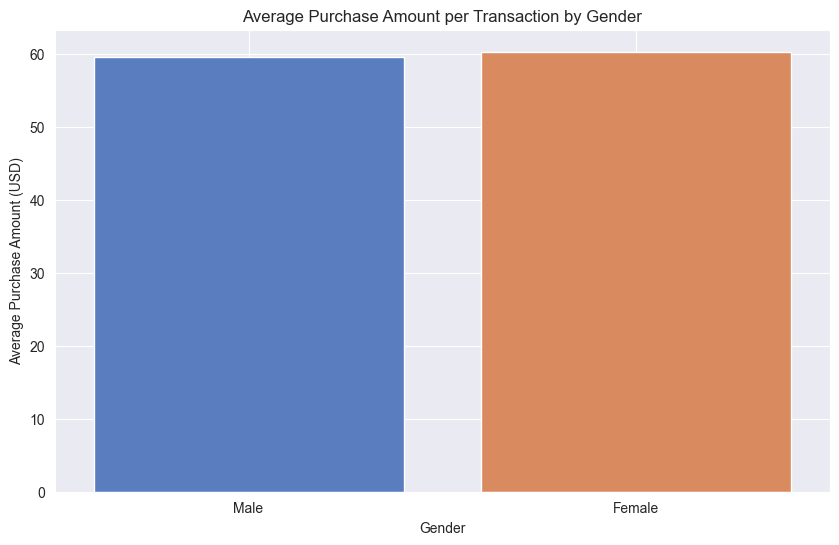

In [65]:
# Plot purchase frequency by gender
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=data, palette='muted', hue='Gender')
plt.title('Purchase Frequency by Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency of Purchases')
plt.grid(True)
plt.show()

# Plot average purchase amount per transaction by gender
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='Purchase Amount (USD)', data=data, estimator=pd.Series.mean, errorbar=None, palette='muted', hue='Gender')
plt.title('Average Purchase Amount per Transaction by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Purchase Amount (USD)')
plt.grid(True)
plt.show()

## Location Segmentation

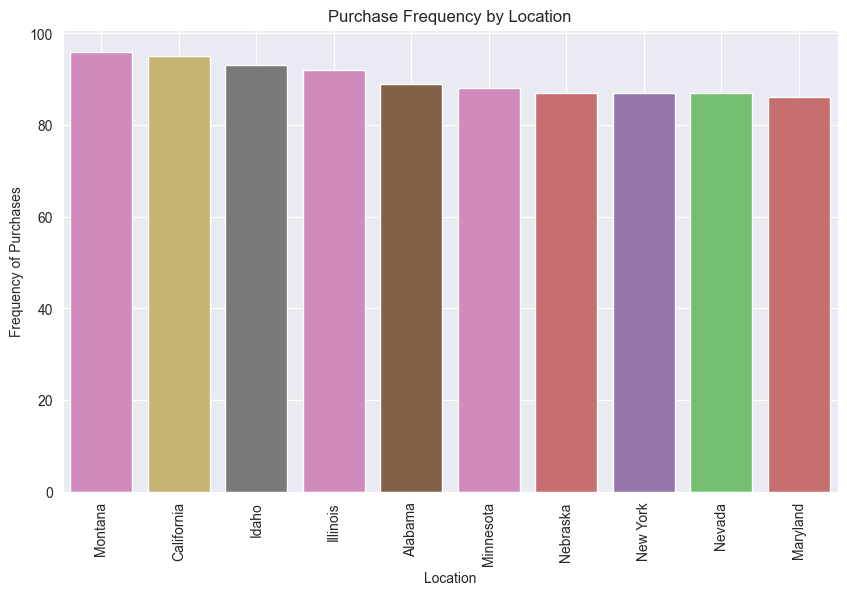

In [66]:
# Plot purchase frequency by location rotation=90
plt.figure(figsize=(10, 6))
sns.countplot(x='Location', data=data, palette='muted', hue='Location', order=data['Location'].value_counts().index[:10])
plt.title('Purchase Frequency by Location')
plt.xlabel('Location')
plt.xticks(rotation='vertical')
plt.ylabel('Frequency of Purchases')
plt.grid(True)
plt.show()

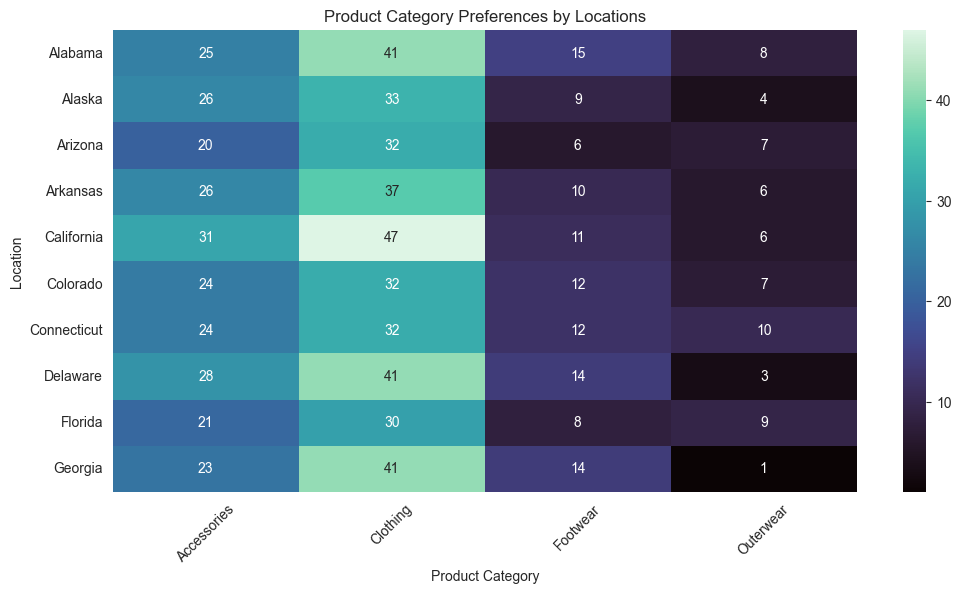

In [67]:
# Calculate the frequency of each product category by location
product_category_frequency_by_location = data.groupby(['Location', 'Category']).size().unstack(fill_value=0).sort_values(by='Location', ascending=True).head(10)
plt.figure(figsize=(12, 6))
sns.heatmap(product_category_frequency_by_location, cmap='mako', annot=True, fmt='d')
plt.title('Product Category Preferences by Locations')
plt.xlabel('Product Category')
plt.ylabel('Location')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

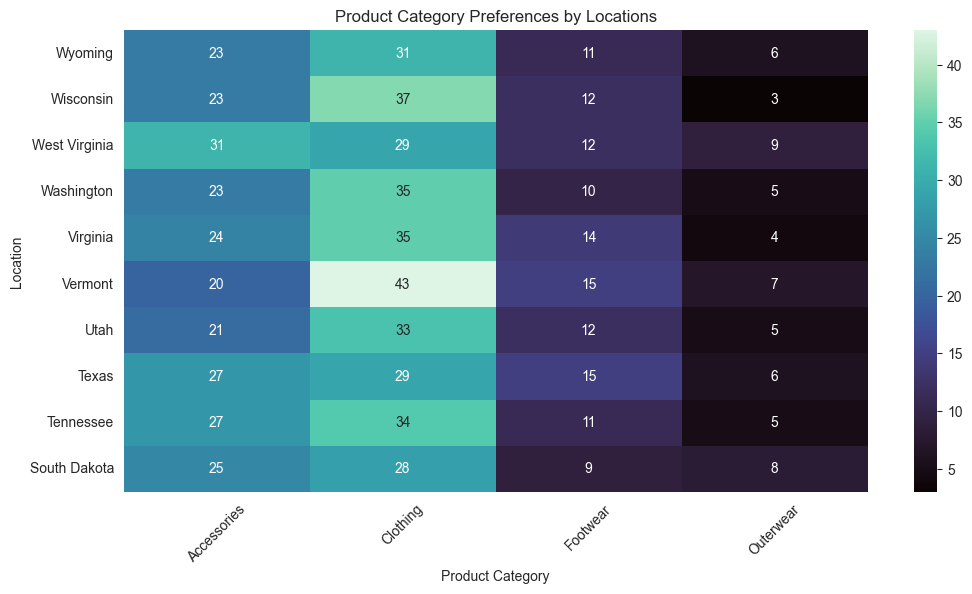

In [68]:
# Calculate the frequency of each product category by locations
product_category_frequency_by_location = data.groupby(['Location', 'Category']).size().unstack(fill_value=0).sort_values(by='Location', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.heatmap(product_category_frequency_by_location, cmap='mako', annot=True, fmt='d')
plt.title('Product Category Preferences by Locations')
plt.xlabel('Product Category')
plt.ylabel('Location')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()